# Exercise 2

## Problem 1
In this problem we will consider the Linear Regression model. In other words, our model is a linear function of the form 

$$f(x_1, \dots, x_p) = \beta_0 + \beta_1 x_1 +  \dots + \beta_p x_p.$$

In Exercise 1, we saw that the regression function minimizes the **expected** square error, for any $x = (x_1, \dots, x_p)$

$$\operatorname{E}\left[\left(Y - f(x_1, \dots, x_p)\right)^2 \mid X = x\right] = 
\operatorname{E}\left[\left(Y - (\beta_0 + \beta_1 x_1 +  \dots + \beta_p x_p)\right)^2 \mid X = x\right].
$$

In finite samples, we cannot compute the theoretical expectation, therefore, we minimize the **mean** square error 

$$MSE(\beta_0, \beta_1, \dots, \beta_p) = \frac{1}{n}\sum_{i = 1}^{n}\left(Y_i - (\beta_0 + \beta_1 x_{i1} +  \dots + \beta_p x_{ip})\right)^2.$$

Notice that $MSE = RSS/n$, where $RSS$ is the residual sum of squares defined in the lecture notes.

Training a linear regression model means finding the set of parameters $\beta_1, \dots, \beta_p$ that minimize the $MSE$. In machine learning, the function that we want to minimize is usually called **cost** function.

We will consider two approaches to train a Linear Regression model.

1. **Analytical solution** --- This method gives a closed-form solution to compute the optimal weights ($\beta$'s) for the regression line.
2. **Gradient descent** --- This method is an iterative optimization techniques that starts with some initial guess of the weights vector $\beta$ and it updates it in order to minimize the cost function.

In [ ]:
 %matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

### 1. Generate synthetic dataset

 Let us start by generating some synthetic data set. In this problem we assume that our regression model has only one predictor and writes
 
 $$f(X_1) = \beta_0 + \beta_1 X_1,$$
 
where $\beta_0 = 4$ and $\beta_1 = 3$. 

Also, we assume that:
- the predictor $X_1$ follows a uniform distribution between 0 and 2, i.e., $X_1 \sim U[0, 2]$,
- the response $Y = f(X_1)+ N(0, 1) = 4 + 3 X_1 + N(0, 1)$, where $N(0, 1)$ denotes a standard normal random variable.

* Import `numpy` as `np`.

In [ ]:
import numpy as np
from numpy.random import RandomState

* Generate 100 observations of the predictor `X1`.

_Hint_: use the function `rand` from `np.random`.

In [ ]:
RandomState(42)
x1=2*(np.random.rand(100))
x1

array([1.1763066 , 1.53323307, 0.24496034, 1.48244991, 0.44581222,
       0.88888545, 1.34020005, 0.96199323, 1.15901509, 1.07333407,
       0.64981006, 1.10107644, 0.40813782, 0.76144129, 0.15448306,
       0.69783528, 0.78057338, 0.62166432, 1.38914958, 0.24372003,
       0.44291901, 1.63164457, 1.75730098, 0.15517019, 1.80675651,
       1.23694946, 1.35626833, 0.91486166, 1.14548545, 0.22317869,
       0.38428932, 1.02694015, 1.87651387, 0.36225937, 1.04759516,
       1.88946657, 1.35376467, 1.2499683 , 0.46462694, 1.09030191,
       0.27368927, 0.85813746, 1.33643347, 1.46249173, 0.55754849,
       0.66221099, 0.26069243, 0.73849583, 1.45109617, 0.68740746,
       1.94483044, 0.30923091, 0.13034677, 0.04159501, 1.70404672,
       0.29576654, 1.72740863, 0.86961537, 1.94920946, 0.02615168,
       0.53264026, 0.02471469, 1.19016883, 1.73692132, 1.62604285,
       0.04758624, 0.31054687, 1.1585991 , 0.54134917, 0.42746598,
       0.24485999, 1.63333014, 1.25293499, 1.74751158, 0.01716

* Generate 100 observations of the response `Y`.

_Hint_: use the function `randn` from `np.random`.

In [ ]:
y=np.array((4+(3*x1)+(np.random.randn(100))))

* Plot the scatter of `X1` and `Y`.

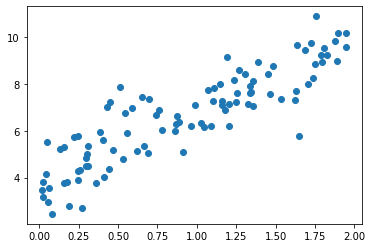

In [ ]:
plt.scatter(x1,y)

### 2. Train linear regression with analytical solution

At this point we train the linear regression with the analytical solution. 

Denote by $X$ the matrix containing the predictor values. In our case, the first column of $X$ contains all 1's (for the intercept) and the second column contains the predictor $X_1$.

The optimal vector $\beta^* = (\beta_0^*, \beta_1^*)$ that minimizes the cost function $MSE(\beta_0, \beta_1)$, is given by

$$\beta^* = (X^T X)^{-1} X^T Y.$$

* Create the matrix `X`.

_Hint_: Use the function `ones` from `np` to generate a column of 1's.

In [ ]:
import pandas as pd

In [ ]:
X=np.transpose(np.array([np.ones(100),x1]))
np.shape(X)

(100, 2)

* Use the formula above to compute the optimal parameter vector $\beta^*$.

_Hint_: Use the functions `dot`, `transpose` from `np`, and the function `inv` from `np.linalg`.

In [ ]:
X_transpose = np.transpose(X)


In [ ]:
#inv_Xtrans_X= np.linalg.inv(np.dot(X_transpose,X))
#np.dot(np.dot(inv_Xtrans_X,X_transpose),y)
#t(X_transpose,X))
#np.dot(np.dot(inv_Xtrans_X,X_transpose),y)
#beta_star=np.dot(np.dot(np.linalg.inv(np.dot(X_transpose,X)),X_transpose),y)

In [ ]:
beta_star=np.linalg.inv(X_transpose @ X) @ X_transpose @ y

In [ ]:
beta_star

array([3.90794709, 2.92534322])

* Using the optimal weights obtained above, compute the model predictions on the training data `X`.

_Hint_: Recall that the predictions can be computed with the formula $ \widehat Y = X \beta^*$.

In [ ]:
y_predicted = beta_star[0] + beta_star[1]*x1 


In [ ]:
#y_predicted = X @ beta_star
print(y_predicted)

[7.34904763 8.39318006 4.62454015 8.24462188 5.21210086 6.5082421
 7.82849221 6.72210747 7.29846403 7.04781763 5.80886454 7.1289736
 5.10189029 6.13542419 4.35986306 5.94935479 6.19139213 5.7265286
 7.9716864  4.62091182 5.2036372  8.68106748 9.04865559 4.36187316
 9.19332999 7.5264488  7.87549746 6.58423145 7.25888519 4.56082136
 5.03212525 6.91209949 9.39739422 4.96768008 6.97252249 9.43528531
 7.86817339 7.56453338 5.26714034 7.09745439 4.70858212 6.41829369
 7.81747368 8.18623735 5.53896778 5.84514153 4.67056192 6.06830086
 8.15290143 5.91884985 9.59724362 4.81255362 4.28925613 4.02962676
 8.8928686  4.77316574 8.96121021 6.45187052 9.61005378 3.98444973
 5.46610267 3.98024605 7.3895994  8.98903811 8.66468051 4.04715317
 4.81640328 7.29724712 5.4915792  5.15843179 4.6242466  8.68599834
 7.57321196 9.02001823 3.9581492  5.40097206 8.8380426  4.45403291
 7.83495485 9.24585147 4.14859663 4.09195993 6.46745439 4.76868013
 9.46177279 9.13596992 7.42780252 5.62977068 9.1516403  7.7247908

### 3. Plot predictions

* Plot the predictions obtained above, together with the scatter of `X1` and `Y`.

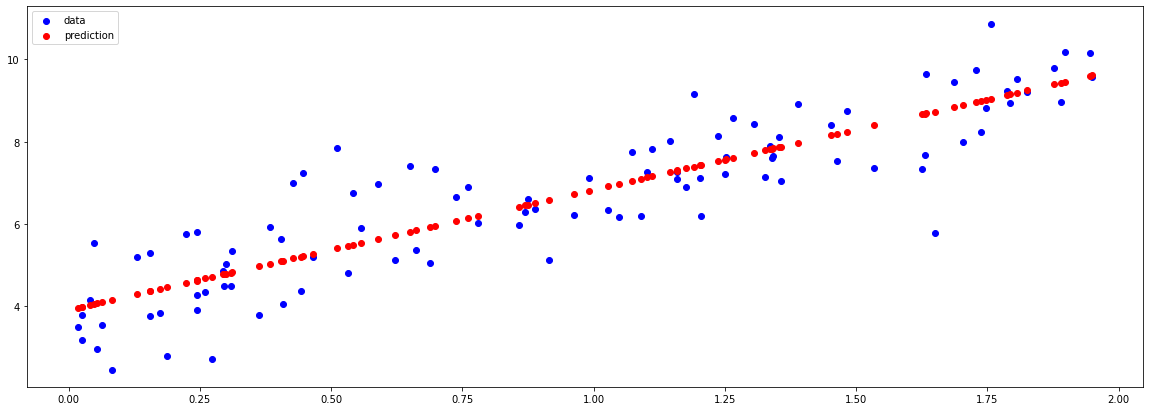

In [ ]:
x_min = x1.min()
x_max = x1.max()

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)

plt.scatter(x1,y,color='b',label='data')
plt.scatter(x1,y_predicted,color='r',label='prediction')
plt.legend(loc="upper left")




### 4. Compare solutions with scikitlearn

* Fit a linear regression model using the `scikit-learn` library.

_Hint_: Be careful, the `fit` method from `scikit-learn` requires the predictor matrix without the intercept.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(x1.reshape((-1, 1)),y.reshape((-1, 1)))

LinearRegression()

* From the fitted object, extract the estimated intercept and slope and compare it to the ones you computed with the formula.

In [ ]:
print('intercept (beta,sklearn): ',(beta_star[0],model.intercept_[0]))
print('coeff (beta,sklearn): ',(beta_star[1],model.coef_[0][0]))

intercept (beta,sklearn):  (3.9079470891856785, 3.907947089185669)
coeff (beta,sklearn):  (2.9253432191651596, 2.925343219165165)


*They are the same!*

### 5. Train linear regression with batch gradient descent

The general idea of gradient descent is to update the parameters iteratively to minimize the cost function.

**Note**: when using gradient descent, it is always better have all features on the same scale. This can be done in the data transformation step using the `StandardScaler` class from `sklearn.preprocessing`. 
This ensures that the algorithm converges to the optimal solution much faster.
In this example, however, we don't need to worry about it.

Recall that in our case the cost function is

$$MSE(\beta_0, \beta_1) = \frac{1}{n}\sum_{i = 1}^{n}(Y_i -\beta_0 - \beta_1 X_{i1})^2.$$

The idea of gradient descent is to start with some initial guess of the vector $\beta = (\beta_0, \beta_1)$, and iteratively update it in the direction that points "most **downhill**" (remember that we want to **minimize** the cost function).

The **gradient vector** of the MSE is denoted as

$$ \nabla MSE(\beta) = \begin{bmatrix}
           \dfrac{\partial MSE(\beta)}{\partial \beta_0} \\
           \dfrac{\partial MSE(\beta)}{\partial \beta_1}
         \end{bmatrix},$$

where each element is the partial derivative of the $MSE$ with respect to $\beta_1$ and $\beta_2$.

Notice that the **gradient vector of any cost function** gives us the direction that points "most **uphill**". 
Since the **gradient** vector points toward the most **uphill** direction, then the **negative gradient** points toward the most **downhill** direction.

In linear regression with the $MSE$ cost function, the **negative gradient** vector writes

$$ -\nabla MSE(\beta) = -\frac{2}{n} X^T (X\beta - Y).$$

Based on the negative gradient vector, at each iteration, we update the previous parameter value $\beta_{\text{old}}$, as follows

$$ \beta_{\text{new}} = \beta_{\text{old}} - \alpha\ \nabla MSE(\beta_{\text{old}}),$$

where $\alpha$ is the learning rate, a **crucial** tuning parameter for the algorithm.

* We now implement the batch gradient descent algorithm. Fill in the `??`. Which value of `beta` do you obtain? What happens if you change `alpha`?

In [ ]:
alpha = 10
n_iterations = 10000

beta = np.random.rand(2, 1) # randomly initialize the parameter vector

for i in range(n_iterations):
    gradient = -((2/n_iterations)*np.transpose(x1))@((beta[0]+beta[1]*x1)-y)  # update gradient
    beta = beta + alpha * gradient # update beta

beta

array([[2.90729356],
       [3.69692422]])

* Fill in the `??` to code the function that plots the first 10 updates of the batch gradient descent algorithm.

In [ ]:
def plot_batch_gradient_descent(X, Y, alpha = 0.1, n_iterations = 100, seed = 42):
    '''
    numpy.ndarray numpy.ndarray float float float -> list
    produces a list with the updates of the parameter vector
    as a side effect, it plots the first 10 updates of the regression function
    '''
    
    nRows, nCols = X.shape
    
    beta_path = []
    
    np.random.seed(seed)
    beta = np.random.rand(nCols, 1) # randomly initialize the parameter vector

    beta_path.append(beta)
    # print(np.shape(beta))
    # gradient = -((2/n_iterations)*np.transpose(x1))@((beta[0]+beta[1]*x1-y))
    # print(np.shape(gradient))
    plt.plot(X[:,1], Y, "b.")
    
    for i in range(n_iterations):
        gradient = -((2/n_iterations)*np.transpose(x1))@((beta[0]+beta[1]*x1-y)) # update gradient
        beta = beta + alpha * gradient # update beta
        beta_path.append(beta)
    
        if (i < 10):
            plt.plot(X[:, 1], X @ beta, "r-")
            
    return(np.array(beta_path))


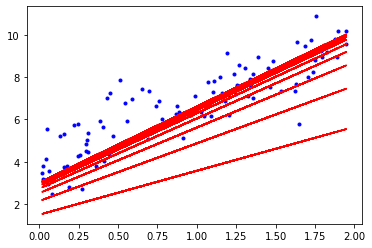

In [ ]:
output=plot_batch_gradient_descent(X,y)

In [ ]:
output

array([[[0.37454012],
        [0.95071431]],

       [[1.49869178],
        [2.07486597]],

       [[2.14655809],
        [2.72273228]],

       [[2.51993365],
        [3.09610784]],

       [[2.73511587],
        [3.31129005]],

       [[2.85912877],
        [3.43530295]],

       [[2.93059935],
        [3.50677354]],

       [[2.97178898],
        [3.54796317]],

       [[2.99552721],
        [3.5717014 ]],

       [[3.00920793],
        [3.58538211]],

       [[3.01709234],
        [3.59326652]],

       [[3.02163625],
        [3.59781044]],

       [[3.02425498],
        [3.60042916]],

       [[3.02576419],
        [3.60193838]],

       [[3.02663397],
        [3.60280816]],

       [[3.02713524],
        [3.60330943]],

       [[3.02742413],
        [3.60359832]],

       [[3.02759062],
        [3.60376481]],

       [[3.02768658],
        [3.60386076]],

       [[3.02774187],
        [3.60391606]],

       [[3.02777374],
        [3.60394793]],

       [[3.02779211],
        [3.6

* Call the function `plot_batch_gradient_descent` with different values of `alpha`. What do you observe?

In [ ]:
#my guess: lower the alpha, more precise the observation

In [ ]:
plot_batch_gradient_descent(alpha=)

### 6. Train linear regression with stochastic gradient descent

The gradient descent scheme that we coded above is known as **batch** gradient descent. This is because at every step it uses **all** the training data to update the gradient vector and the parameter vector $\beta$.
This makes it very slow when the training dataset contains many observations.

At the other end of the spectrum, we have the **stochastic** gradient descent. Here, at every step, we randomly choose one random observation (row) from the dataset, to update the gradient vector and the parameter vector $\beta$. In other words, the updates at every step depend only on a single observation.

This makes the algorithm much faster to compute each iteration, compared to the batch version. On the other hand, since our updates depend on a single observation, this algorithm is more "erratic" than the batch version, and it will never settles at the minimum point, unless we "stop it".

This is why, in the stochastic gradient descent, it is important to have a learning rate $\alpha$ that slowly decays to zero, as the number of iterations increases. 
One common choice is to define the learning rate as follows

$$\alpha(t) = \dfrac{\eta_0}{t^{k}},$$

where $t$ denotes the number of iterations, and $\eta_0$ and $k$ are hyperparameters. The defaults values in `scikit-learn` are $\eta_0 = 0.01$ and $k = 0.25$ ([see link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)).

* Import the `SGDRegressor` class from `sklearn.linear_model`.

In [ ]:
from sklearn.linear_model import SGDRegressor

* Create an object of class `SGDRegressor` and fill in the `??`. Also, look at the documentation of the function and explain the different arguments.

**max_iter is the maximum iteration we want the algorithm to do. tol is the stopping criterion. eta0 = is the initial learning rate. Penalty is which regularizer we want to use.**

In [ ]:
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3, eta0=0.01, penalty=None)

* Fit the stochastic gradient descent on the data. Fill in the `??`.

_Hint_: Be careful, the `fit` method from `scikit-learn` requires the predictor matrix without the intercept.

In [ ]:
sgd_reg.fit(x1.reshape(-1,1), y.ravel())

* From the fitted object, extract the estimated intercept and slope and compare it to the ones you computed with the analytical solution.

In [ ]:
print('intercept (beta,sdgreg): ',(beta_star[0],sgd_reg.intercept_[0]))
print('coeff (beta,sdgreg): ',(beta_star[1],sgd_reg.coef_[0]))

### 7. Plot the downhill path of batch and stochastic gradient descent

We now show the downhill path of the batch and stochastic gradient descent.

In [ ]:
def plot_stochastic_gradient_descent(X, Y, eta0 = 0.1, n_iterations = 100, seed = 42):
    '''
    numpy.ndarray numpy.ndarray float float float -> list
    produces a list with the updates of the parameter vector
    as a side effect, it plots the first 10 updates of the regression function
    '''
    
    nRows, nCols = X.shape
    
    beta_path = []
    
    np.random.seed(seed)
    beta = np.random.rand(nCols, 1) # intialize parameter
    
    beta_path.append(beta)
    
    plt.plot(X[:,1], Y, "b.")
    
    for i in range(n_iterations):
        for j in range(nRows):
            
            random_row = np.random.randint(nRows)
            Xj = X[random_row:random_row+1]
            Yj = Y[random_row:random_row+1]
            
            gradient = 2 * Xj.T @ (Xj @ beta - Yj) # update gradient
            alpha = eta0 / (j + i * nRows + 1)**0.25 # update learning rate
            beta = beta - alpha * gradient # update beta
            beta_path.append(beta)

            if (i == 0 and j < 10):
                plt.plot(X[:, 1], X @ beta, "r-")
            
    return(np.array(beta_path))


* Call the functions `plot_batch_gradient_descent` and `plot_stochastic_gradient_descent` with the default arguments. Save the results into the objects `path_batch` and `path_stoch`.

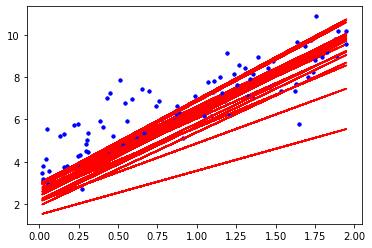

In [ ]:
path_batch = plot_batch_gradient_descent(X,y)
path_stoch = plot_stochastic_gradient_descent(X,y)

In [ ]:
print(path_batch[-1])
print(path_stoch[-1])
print(np.shape([path_stoch[i][0] for i in range(len(path_stoch))]))
print(np.shape([path_batch[i][0] for i in range(len(path_batch))]))

[[3.02781709]
 [3.60399128]]
[[3.80895428]
 [2.96568055]]
(10001, 1)
(101, 1)


* Fill in the `??` to plot the downhill paths of the **batch** and the **stochastic** gradient descent algorithms. Which differences do you notice between the two methods?

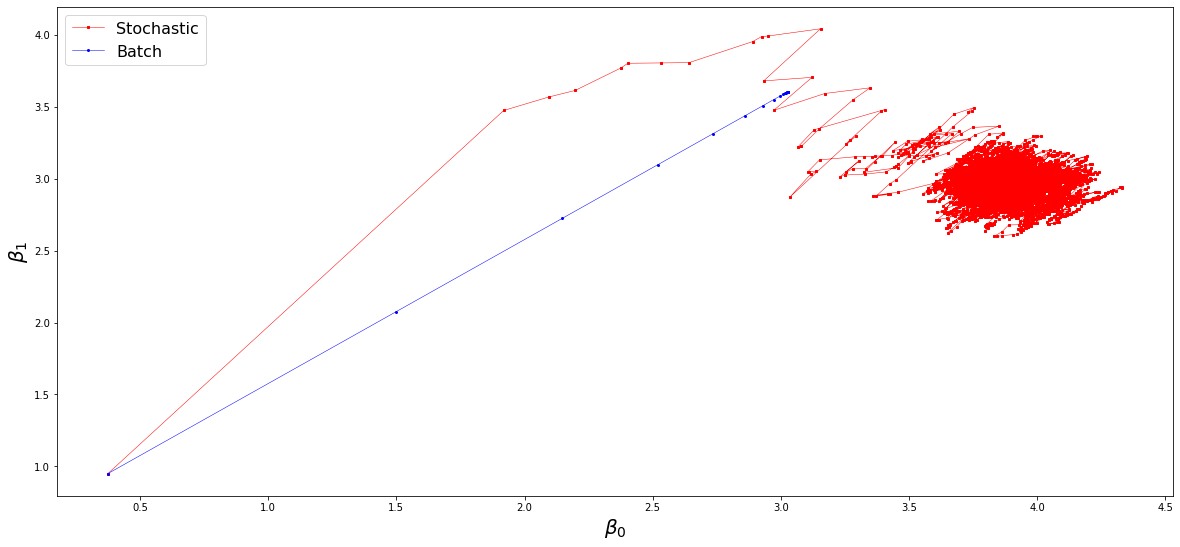

In [ ]:
plt.figure(figsize=(20,9))
plt.plot([path_stoch[i][0] for i in range(len(path_stoch))],[path_stoch[i][1] for i in range(len(path_stoch))], "r-s",markersize=2, linewidth=.5, label="Stochastic")
plt.plot([path_batch[i][0] for i in range(len(path_batch))],[path_batch[i][1] for i in range(len(path_batch))], "b-o",markersize=2, linewidth=.5, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel("$\\beta_0$", fontsize = 20)
plt.ylabel("$\\beta_1$", fontsize = 20);

## Problem 2
Suppose our data is generated by the additive error model
$$ Y = f(X) + \epsilon,$$

where $f:\mathbb{R}^p \to \mathbb{R}$ is a (deterministic) function, and $\epsilon$ is a noise
variable with $\mathrm{E}(\epsilon)= 0$
and $\mathrm{V}(\epsilon) = \sigma^2_\epsilon$.

Define the joint distribution of the random samples
$D = (X_1, \dots, X_n, Y_1, \dots, Y_n) \sim P_D$.

Let $\hat f$ be an estimate of the regression function $f$. 
Recall that $\hat f$ is a random variable
since it depends on the training data  $D$ that are random. 
Therefore, the expected value of $\hat f$ can be written as
\begin{align*}
\mathrm{E}_{P_D}[\hat f] = \int \hat f \ dP_D.
\end{align*}

Consider a new (**fixed**) data point $X = x_0$, which is independent of the training data.

Conditional on this value, we have that
$Y = f(x_0) + \epsilon \sim P_{Y\mid x_0}$, where $P_{Y|x_0}$ denotes the
conditional distribution of $Y$ given $X = x_0$.
Therefore, the conditional expectation of $Y$, given $X = x_0$, can be written
as
\begin{align*}
\mathrm{E}_{P_{Y\mid x_0}}[Y \mid X = x_0] = \int y \ dP_{Y\mid x_0}.
\end{align*}

Show the following Bias-Variance decomposition of the expected prediction error at the new 
point $X = x_0$:

\begin{align}
\mathrm{E}rr_{\hat f} (x_0) &= \mathrm{E}_{P_D}\mathrm{E}_{P_{Y\mid x_0}}[ (Y-\hat f(x_0))^2 \mid X_0 = x_0 ]\\
& = \sigma_\epsilon^2 + [\mathrm{E}_{P_D} \hat f(x_0) - f(x_0)]^2
+ \mathrm{E}_{P_D}[\hat f(x_0) - \mathrm{E}_{P_D} \hat f(x_0) ]^2\\
& = \text{Irreducible Error} + \text{Bias}^2 + \text{Variance}.
\end{align}

_Hint_: Note that 
$$ \mathrm{E}_{P_D}\left[ (f(x_0) - \mathrm{E}_{P_D}\hat f(x_0))(\mathrm{E}_{P_D} \hat f(x_0) - \hat f(x_0))\right] = 0,$$
since $\mathrm{E}_{P_D}\left[\mathrm{E}_{P_D} \hat f(x_0) - \hat f(x_0)\right] = 0$.


*Answer*
\begin{align}
\mathrm{E}rr_{\hat f} (x_0) & =\mathrm{E}_{P_D}\mathrm{E}_{P_{Y\mid x_0}}[ (Y-\hat f(x_0))^2 \mid X_0 = x_0 ]\\
& =\mathrm{E}_{P_D}\mathrm{E}_{P_{Y\mid x_0}}[ (f(x_0)+ε-\hat f(x_0))^2 \mid X_0 = x_0 ]\\
& =\mathrm{E}_{P_D}\mathrm{E}_{P_{Y\mid x_0}}[ (f(x_0)-\hat f(x_0)+ε)^2 \mid X_0 = x_0 ]\\
& =\mathrm{E}_{P_D}\mathrm{E}_{P_{Y\mid x_0}}[ (f(x_0)-\hat f(x_0))^2-2(f(x_0)-\hat{f}(x_0))ε+ε^2 \mid X_0 = x_0 ]\\
& =σ_ε^2+\mathrm{E}_{P_D}\mathrm{E}_{P_{Y\mid x_0}}[ (f(x_0)-\hat f(x_0))^2-2(f(x_0)-\hat{f}(x_0))ε \mid X_0 = x_0 ] & ,\ μ_ε=0\\
& =σ_ε^2+\mathrm{E}_{P_D}[ (f(x_0)-\hat f(x_0))^2-2(f(x_0)-\hat{f}(x_0))ε] &\text{ε indep from $X$}\\
&=...\\
& = \sigma_\epsilon^2 + [\mathrm{E}_{P_D} \hat f(x_0) - f(x_0)]^2
+ \mathrm{E}_{P_D}[\hat f(x_0) - \mathrm{E}_{P_D} \hat f(x_0) ]^2\\
& = \text{Irreducible Error} + \text{Bias}^2 + \text{Variance}.
\end{align}